In [1]:
import pandas, seaborn, numpy
import matplotlib, matplotlib.pyplot

# 0. user defined variables

In [2]:
data_file_partial = '~/gd15/hi/research/plefa/data/Partial_Heatmap_Recalculate_tdy.xlsx'
data_file_full = '~/gd15/hi/research/plefa/data/FULL_Heatmap_Recalculate_tdy.xlsx'

In [3]:
days = ['07', 14, 21, 28, 60]

In [4]:
epa_group = ['EPA', '18-HEPE', '15-HEPE', '5-HEPE', '12-HEPE']
dha_group = ['DHA', '10-HDHA', '4-HDHA', '7-HDHA', '14(S)-HDHA', '17-HDHA', '19,20-DiHDPA']
aa_group = ['5-HETE',  '8-HETE', '11-HETE', '12-HETE', '15-HETE', '14,15-diHETE', '5,15-diHETE', '8S,15S-diHETE', '17-OH-DH-HETE', 'PGF2a', 'PGJ2','13,14dihydro-15keto-PGF2a', '8-iso-PGF2a', 'PGE2_2', 'PGD2','6-trans-LTB4','6t,12epi-LTB4', 'LXA4','AA', '5-KETE', '12-KETE', '15-KETE']
la_group = ['9-HoDE', '13-HoDE', '9-HoTrE', '13-HoTrE']

groups = [epa_group, dha_group, aa_group, la_group]
merged_group = epa_group + dha_group + aa_group + la_group
for group in groups:
    print(len(group))

5
7
22
4


In [5]:
linkage_method = 'complete'
distance_metric = 'cosine'

# 1. read data

In [6]:
t1 = pandas.read_excel(data_file_partial, index_col='Compound', sheet_name='T1')
t2 = pandas.read_excel(data_file_partial, index_col='Compound', sheet_name='T2')
t3 = pandas.read_excel(data_file_full, index_col='Compound', sheet_name='T3')
t4 = pandas.read_excel(data_file_full, index_col='Compound', sheet_name='T4')

In [7]:
#t1.columns
t1

,Nm,Treatment,DAY,Average,St. Dev.,St. Error,Fold
Compound,,,,,,,
EPA,1,T1,C,0.012868,0.008720,0.004360,1.000000
EPA,2,T1,07,0.063422,0.032346,0.011436,4.928677
EPA,3,T1,14,0.044721,0.026501,0.010017,3.475378
EPA,4,T1,21,0.056946,0.052907,0.018705,4.425368
EPA,5,T1,28,0.035038,0.026557,0.009389,2.722852
...,...,...,...,...,...,...,...
10S17R-diHAdA,320,T1,07,0.027533,0.034255,0.012111,1.366824
10S17R-diHAdA,321,T1,14,0.049424,0.061451,0.021726,2.453515
10S17R-diHAdA,322,T1,21,0.056772,0.073813,0.026097,2.818295


# 2. reformat data

In [8]:
container = {}
for compound in merged_group:
    sub = t1.loc[compound, :]
    trajectory = []
    for day in days:
        #print(compound, day)
        fold_value = float(sub[sub['DAY'] == day]['Fold '].values)
        #print(fold_value)
        #print()
        log2fc = numpy.clip(numpy.log2(fold_value), -3, 3)
        trajectory.append(log2fc)
    container[compound] = trajectory
df1 = pandas.DataFrame.from_dict(container, orient='index', columns=[7, 14, 21, 28, 60])
print(df1.shape)

container = {}
for compound in merged_group:
    sub = t2.loc[compound, :]
    trajectory = []
    for day in days:       
        fold_value = float(sub[sub['DAY'] == day]['Fold '].values)
        log2fc = numpy.clip(numpy.log2(fold_value), -3, 3)
        trajectory.append(log2fc)
    container[compound] = trajectory
df2 = pandas.DataFrame.from_dict(container, orient='index', columns=[7, 14, 21, 28, 60])
print(df2.shape)

partial_contrast = pandas.concat([df1, df2], axis=1)

print(partial_contrast.shape)
partial_contrast.head()

###
print()
###

container = {}
for compound in merged_group:
    sub = t3.loc[compound, :]
    trajectory = []
    for day in days:        
        fold_value = float(sub[sub['DAY'] == day]['Fold '].values)
        log2fc = numpy.clip(numpy.log2(fold_value), -3, 3)
        trajectory.append(log2fc)
    container[compound] = trajectory
df3 = pandas.DataFrame.from_dict(container, orient='index', columns=[7, 14, 21, 28, 60])
print(df3.shape)

container = {}
for compound in merged_group:
    sub = t4.loc[compound, :]
    trajectory = []
    for day in days:       
        fold_value = float(sub[sub['DAY'] == day]['Fold '].values)
        log2fc = numpy.clip(numpy.log2(fold_value), -3, 3)
        trajectory.append(log2fc)
    container[compound] = trajectory
df4 = pandas.DataFrame.from_dict(container, orient='index', columns=[7, 14, 21, 28, 60])
print(df4.shape)

full_contrast = pandas.concat([df3, df4], axis=1)
print(full_contrast.shape)

EPA 07
4.9286771778362715

EPA 14
3.475377840575431

EPA 21
4.425368338470352

EPA 28
2.72285154843096

EPA 60
4.42791949635162

18-HEPE 07
3.118649002846724

18-HEPE 14
1.0785253141190765

18-HEPE 21
0.8173804594456605

18-HEPE 28
0.9956858788562316

18-HEPE 60
0.7614095508748484

15-HEPE 07
6.980017157540313

15-HEPE 14
9.772287631404888

15-HEPE 21
15.424162848972417

15-HEPE 28
3.280393643552088

15-HEPE 60
0.9512112965909554

5-HEPE 07
4.51150712245386

5-HEPE 14
9.31857663042148

5-HEPE 21
7.360364858425854

5-HEPE 28
2.1117833514002857

5-HEPE 60
1.5706029920559

12-HEPE 07
5.219935174397186

12-HEPE 14
6.775142102739558

12-HEPE 21
2.378809455975511

12-HEPE 28
2.1950870813378334

12-HEPE 60
0.8443352349443026

DHA 07
11.469197728808872

DHA 14
6.679483224595815

DHA 21
7.231711145343837

DHA 28
4.886285817291278

DHA 60
4.609224794231249

10-HDHA 07
4.255137885756161

10-HDHA 14
2.0663310349493527

10-HDHA 21
0.9313251645445233

10-HDHA 28
0.8561295573895692

10-HDHA 60
0.6149

# 3. plot regular heatmaps

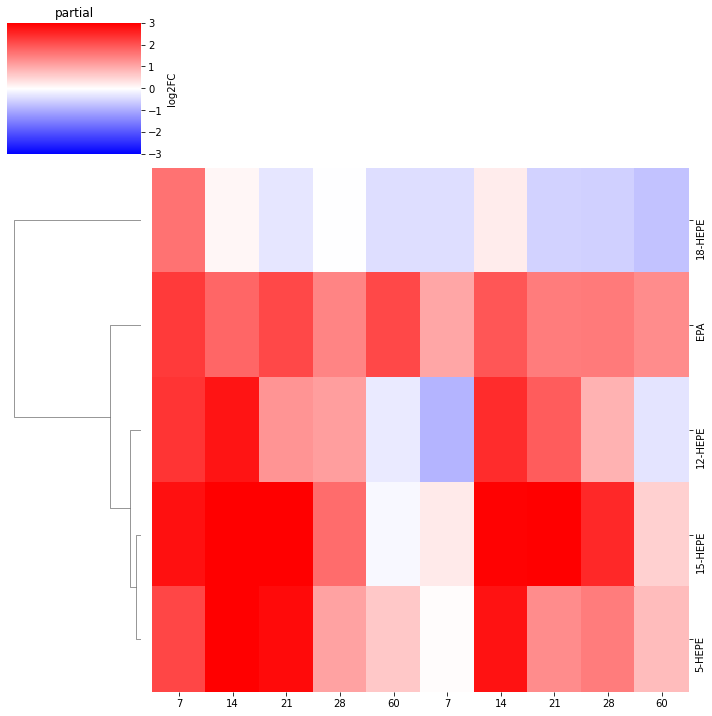

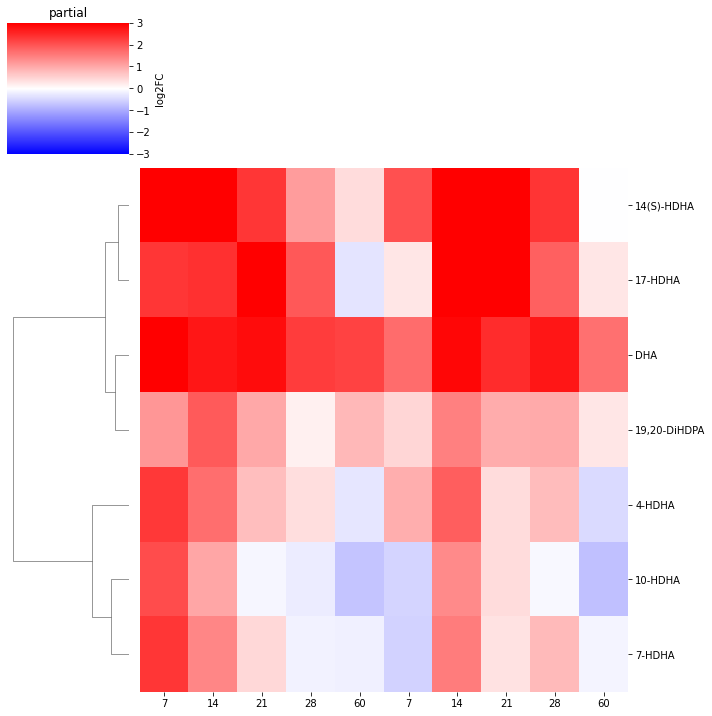

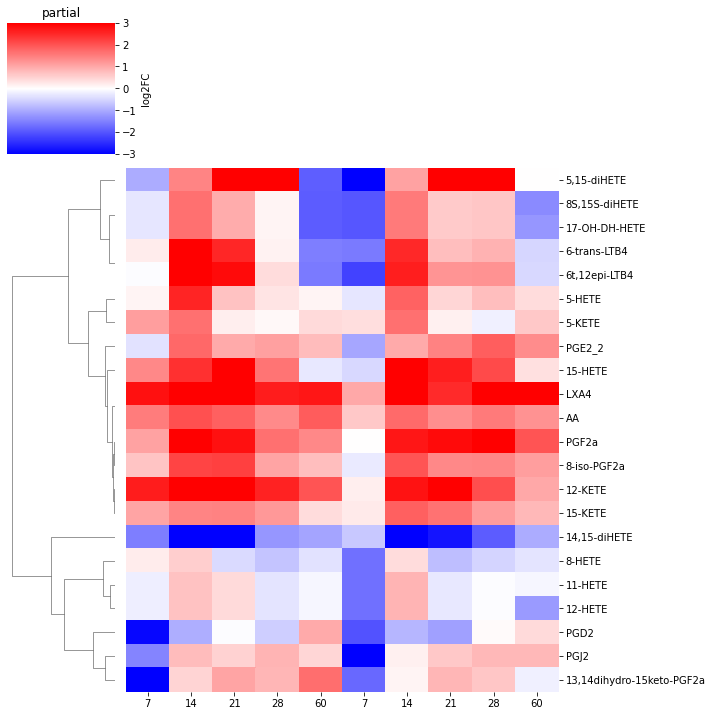

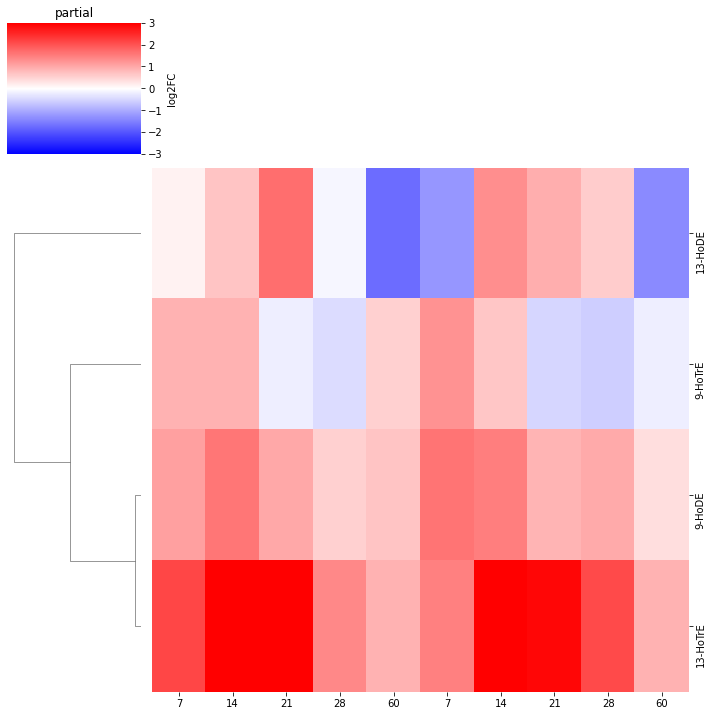

In [9]:
for group in groups:
    sub = partial_contrast.loc[group, :]
    seaborn.clustermap(sub, cmap='bwr', col_cluster=False, method=linkage_method, metric=distance_metric, yticklabels=1, cbar_kws={'label':'log2FC'}, vmin=-3, vmax=3)
    matplotlib.pyplot.title('partial')
    matplotlib.pyplot.tight_layout()
    figure_file = 'figures/figure_partial_{}.svg'.format(groups.index(group))
    matplotlib.pyplot.savefig(figure_file)

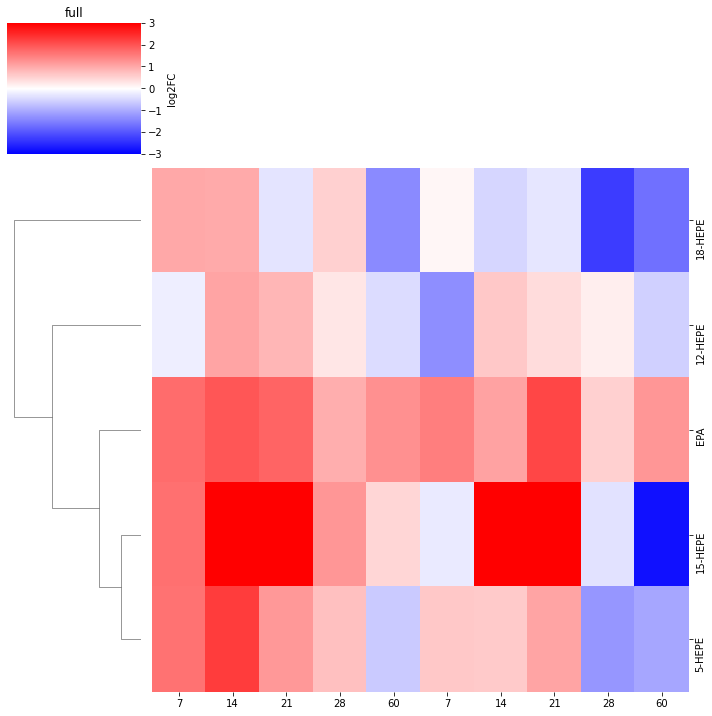

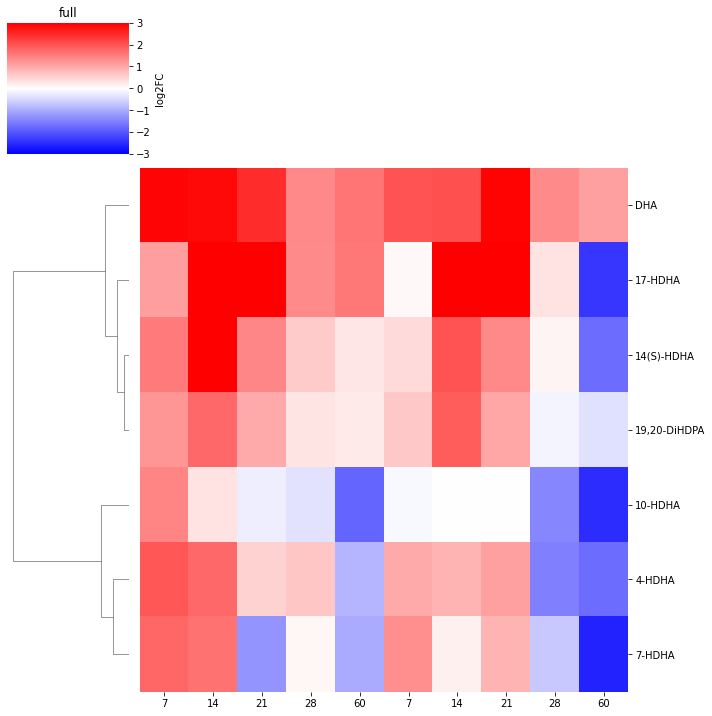

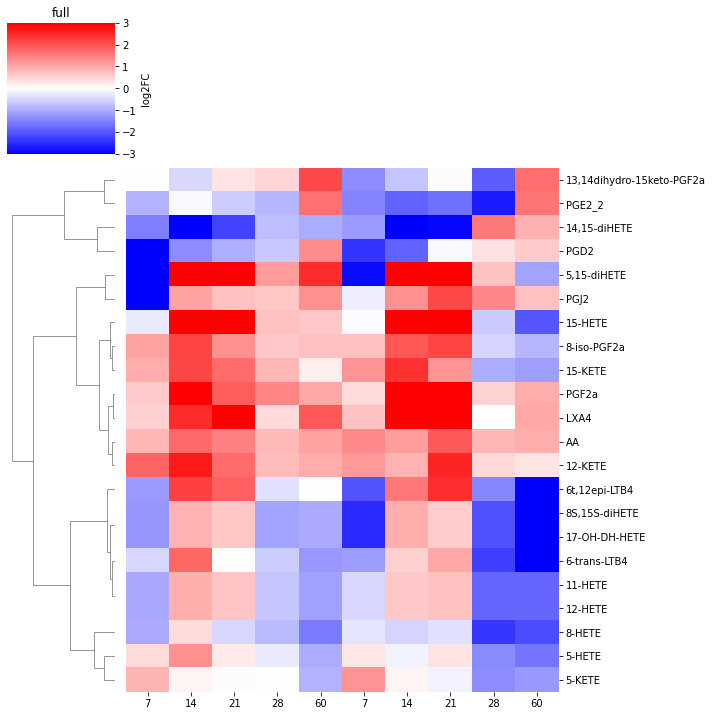

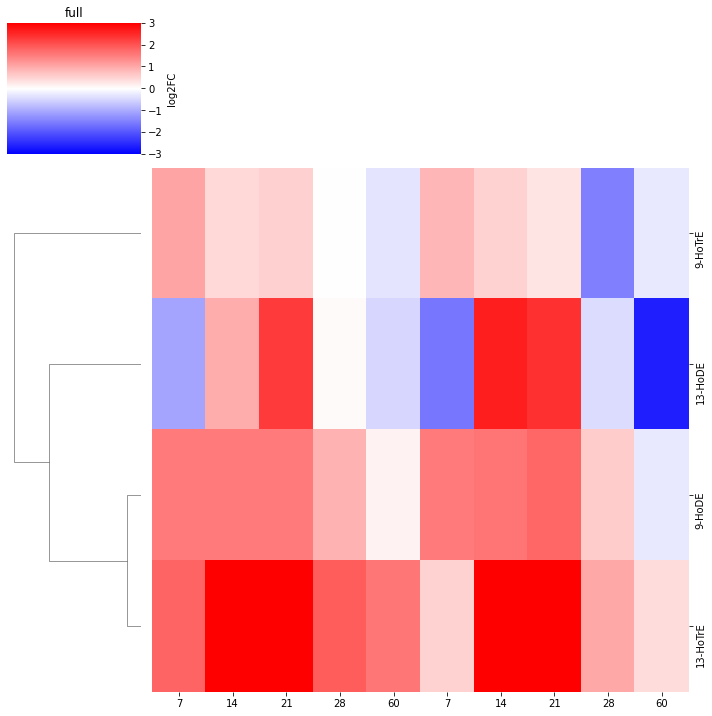

In [10]:
for group in groups:
    sub = full_contrast.loc[group, :]
    seaborn.clustermap(sub, cmap='bwr', col_cluster=False, method=linkage_method, metric=distance_metric, yticklabels=1, cbar_kws={'label':'log2FC'}, vmin=-3, vmax=3)
    matplotlib.pyplot.title('full')
    matplotlib.pyplot.tight_layout()
    figure_file = 'figures/figure_full_{}.svg'.format(groups.index(group))
    matplotlib.pyplot.savefig(figure_file)

# 4. plot differences per group

In [11]:
ordered_groups = [groups[-1], groups[2], groups[1], groups[0]]
group_names = ['LA', 'AA', 'DHA', 'EPA']

## 4.1. partial contrast

In [12]:
plotting_difference_partial_contrast = pandas.DataFrame()
for i in range(len(group_names)):
    label = group_names[i]
    group = ordered_groups[i]
    
    sub = partial_contrast.loc[group, :]
    print(group, sub.shape)
    difference = sub.iloc[:, :5] - sub.iloc[:, 5:]
    group_difference = difference.mean()
    print(difference)
    print(group_difference)
    
    df = pandas.DataFrame({label:group_difference}).transpose()
    plotting_difference_partial_contrast = pandas.concat([plotting_difference_partial_contrast, df])
    print()

['9-HoDE', '13-HoDE', '9-HoTrE', '13-HoTrE'] (4, 10)
                7         14        21        28        60
9-HoDE   -0.532027  0.091846  0.150928 -0.432225  0.297311
13-HoDE   1.380467 -0.629915  0.764058 -0.701530 -0.354004
9-HoTrE  -0.368340  0.231778  0.276295  0.163586  0.753954
13-HoTrE  0.694103  0.000000  0.074056 -0.730299 -0.001514
7     0.293551
14   -0.076573
21    0.316334
28   -0.425117
60    0.173936
dtype: float64

['5-HETE', '8-HETE', '11-HETE', '12-HETE', '15-HETE', '14,15-diHETE', '5,15-diHETE', '8S,15S-diHETE', '17-OH-DH-HETE', 'PGF2a', 'PGJ2', '13,14dihydro-15keto-PGF2a', '8-iso-PGF2a', 'PGE2_2', 'PGD2', '6-trans-LTB4', '6t,12epi-LTB4', 'LXA4', 'AA', '5-KETE', '12-KETE', '15-KETE'] (22, 10)
                                 7         14        21        28        60
5-HETE                     0.428552  0.717996  0.226631 -0.426768 -0.259688
8-HETE                     1.888211  0.176369  0.308679 -0.186954 -0.011613
11-HETE                    1.468988 -0.178349  

In [13]:
plotting_difference_partial_contrast

,7,14,21,28,60
LA,0.293551,-0.076573,0.316334,-0.425117,0.173936
AA,1.114526,0.164721,0.390571,-0.284190,-0.180830
DHA,1.701932,-0.139051,-0.037644,-0.554861,0.147457
EPA,2.246267,0.049980,0.339097,-0.119073,0.087635


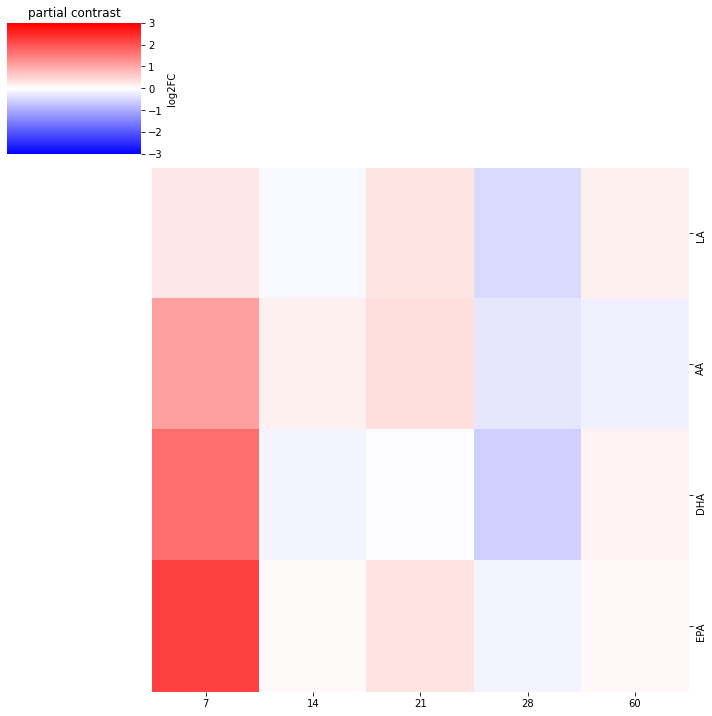

In [14]:
seaborn.clustermap(plotting_difference_partial_contrast, cmap='bwr', col_cluster=False, row_cluster=False, method=linkage_method, metric=distance_metric, yticklabels=1, cbar_kws={'label':'log2FC'}, vmin=-3, vmax=3)
matplotlib.pyplot.title('partial contrast')
matplotlib.pyplot.tight_layout()
figure_file = 'figures/differences_partial.svg'
matplotlib.pyplot.savefig(figure_file)

## 4.2. full burn contrast

In [15]:
plotting_difference_full_contrast = pandas.DataFrame()
for i in range(len(group_names)):
    label = group_names[i]
    group = ordered_groups[i]
    
    sub = full_contrast.loc[group, :]
    print(group, sub.shape)
    difference = sub.iloc[:, :5] - sub.iloc[:, 5:]
    group_difference = difference.mean()
    print(difference)
    print(group_difference)
    
    df = pandas.DataFrame({label:group_difference}).transpose()
    plotting_difference_full_contrast = pandas.concat([plotting_difference_full_contrast, df])
    print()

['9-HoDE', '13-HoDE', '9-HoTrE', '13-HoTrE'] (4, 10)
                7         14        21        28        60
9-HoDE    0.009703 -0.064061 -0.234277  0.288024  0.437038
13-HoDE   0.540217 -1.674572 -0.112295  0.478340  2.153694
9-HoTrE   0.227095 -0.077973  0.234049  1.501411 -0.054151
13-HoTrE  1.296601  0.000000  0.000000  0.888320  1.183555
7     0.518404
14   -0.454152
21   -0.028131
28    0.789024
60    0.930034
dtype: float64

['5-HETE', '8-HETE', '11-HETE', '12-HETE', '15-HETE', '14,15-diHETE', '5,15-diHETE', '8S,15S-diHETE', '17-OH-DH-HETE', 'PGF2a', 'PGJ2', '13,14dihydro-15keto-PGF2a', '8-iso-PGF2a', 'PGE2_2', 'PGD2', '6-trans-LTB4', '6t,12epi-LTB4', 'LXA4', 'AA', '5-KETE', '12-KETE', '15-KETE'] (22, 10)
                                 7         14        21        28        60
5-HETE                     0.135968  1.450109 -0.077750  1.122784  0.658530
8-HETE                    -0.671084  0.931714 -0.102166  1.538170  0.542506
11-HETE                   -0.545298  0.305999 -

In [16]:
plotting_difference_full_contrast

,7,14,21,28,60
LA,0.518404,-0.454152,-0.028131,0.789024,0.930034
AA,-0.006672,0.406918,-0.204382,0.796437,1.021683
DHA,0.946165,0.623460,-0.489129,0.849407,1.455125
EPA,1.039240,0.886763,0.044828,1.379920,0.839641


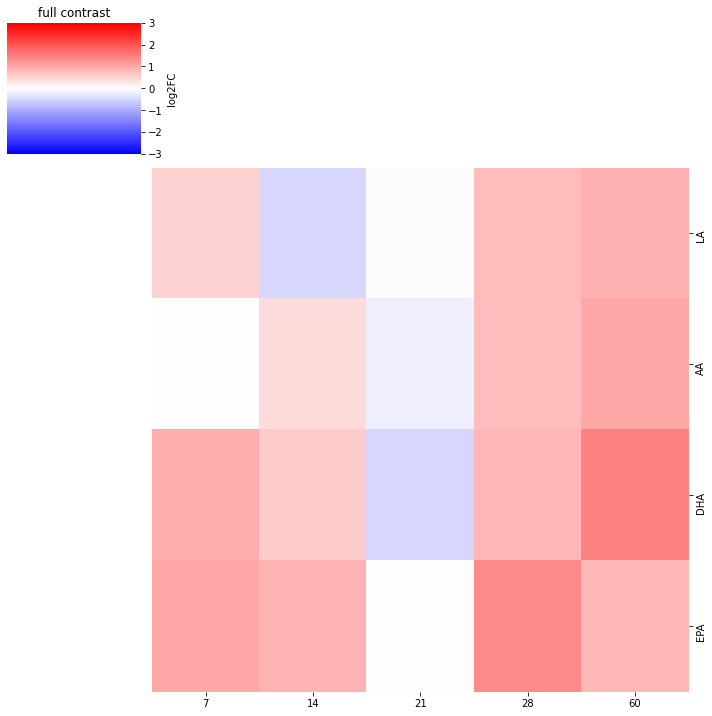

In [17]:
seaborn.clustermap(plotting_difference_full_contrast, cmap='bwr', col_cluster=False, row_cluster=False, method=linkage_method, metric=distance_metric, yticklabels=1, cbar_kws={'label':'log2FC'}, vmin=-3, vmax=3)
matplotlib.pyplot.title('full contrast')
matplotlib.pyplot.tight_layout()
figure_file = 'figures/differences_full.svg'
matplotlib.pyplot.savefig(figure_file)

# 5. Bootstrap and KS

In [18]:
iterations = int(1e6)
group_sizes = [4, 22, 7, 5]

## 5.1.partial

In [19]:
partial_contrast

,7,14,21,28,60,7,14,21,28,60
EPA,2.301200,1.797170,2.145798,1.445118,2.146629,1.050318,1.976671,1.544857,1.569617,1.340690
18-HEPE,1.640921,0.109060,-0.290920,-0.006237,-0.393255,-0.383322,0.226797,-0.517494,-0.560946,-0.706014
15-HEPE,2.803231,3.000000,3.000000,1.713869,-0.072162,0.247916,2.964190,3.000000,2.522725,0.545912
5-HEPE,2.173609,3.000000,2.879777,1.078462,0.651319,0.035576,2.773541,1.343186,1.538765,0.781805
12-HEPE,2.384032,2.760251,1.250240,1.134278,-0.244112,-0.878828,2.475383,1.918859,0.890694,-0.312150
DHA,3.000000,2.739736,2.854337,2.288738,2.204524,1.715337,2.927259,2.482506,2.720623,1.678769
10-HDHA,2.089206,1.047071,-0.102643,-0.224099,-0.701435,-0.514706,1.379943,0.409529,-0.092708,-0.737186
4-HDHA,2.339784,1.693778,0.761304,0.388290,-0.295850,0.955152,1.891816,0.415049,0.794056,-0.432654
7-HDHA,2.362521,1.410958,0.453051,-0.156459,-0.170688,-0.519297,1.529504,0.328907,0.799516,-0.139878
14(S)-HDHA,3.000000,3.000000,2.361236,1.167444,0.408389,2.061470,3.000000,3.000000,2.383065,-0.013339


In [20]:
null_distributions = {}
for element in group_sizes:
    null_distributions[element] = []

In [21]:
%%time
# necio5: 46.6 s
# drangajokull: 

for i in range(iterations):
    
    #print('iteration {}'.format(i))
    
    values = partial_contrast.values
    original_shape = values.shape
    flatten_values = values.flatten()
    numpy.random.shuffle(flatten_values)
    final = flatten_values.reshape(original_shape)
    
    for group_size in group_sizes:
#         print('working with size {}'.format(group_size))
        working_data = final[:group_size, :]
        difference = working_data[:, :5] - working_data[:, 5:]
        expected_difference = difference.mean(axis=0)

#         print(working_data)
#         print()
#         print(difference)
#         print()
#         print(expected_difference)
#         print()
#         print(expected_difference[0])
#         print()
    
        null_distributions[group_size].append(expected_difference[0])

CPU times: user 49.7 s, sys: 832 ms, total: 50.6 s
Wall time: 49.9 s


In [22]:
for group_size in group_sizes:
    null_distributions[group_size].sort()

In [23]:
null_distributions

{4: [-4.574074963022159,
  -4.393070145093645,
  -4.354097905348517,
  -4.272992693957822,
  -4.239465261021736,
  -4.238872692072679,
  -4.22508856633101,
  -4.212128976902637,
  -4.13185134121037,
  -4.124636895622573,
  -4.121606167363864,
  -4.120991850472061,
  -4.111459884324512,
  -4.109691953662187,
  -4.1062565465540795,
  -4.090794178938914,
  -4.064337982316173,
  -4.062907318509227,
  -4.060926307640353,
  -4.053686061710476,
  -4.037168659497576,
  -3.9967508722269525,
  -3.992744256342163,
  -3.9791480953679894,
  -3.973210318154018,
  -3.9658552883150056,
  -3.9581792137533474,
  -3.950273717366308,
  -3.944600946883571,
  -3.9369750179588703,
  -3.9270750285836877,
  -3.9111982210528966,
  -3.9089909240879153,
  -3.904811301351726,
  -3.9027958375721488,
  -3.902706738025143,
  -3.9000438800275057,
  -3.8963678795877232,
  -3.892907936130823,
  -3.8914661731775833,
  -3.886359899448306,
  -3.8861312829895454,
  -3.8827154983505525,
  -3.8788053843070203,
  -3.8722805352

In [24]:
plotting_difference_partial_contrast

,7,14,21,28,60
LA,0.293551,-0.076573,0.316334,-0.425117,0.173936
AA,1.114526,0.164721,0.390571,-0.284190,-0.180830
DHA,1.701932,-0.139051,-0.037644,-0.554861,0.147457
EPA,2.246267,0.049980,0.339097,-0.119073,0.087635


In [25]:
for i in range(len(group_sizes)):
    print(group_names[i], group_sizes[i])
    
    for day in plotting_difference_partial_contrast.columns:
        value = plotting_difference_partial_contrast.loc[group_names[i], day]
        a = null_distributions[group_sizes[i]]
        rank = min(range(len(a)), key=lambda j: abs(a[j]-value))
        relative_rank = rank/iterations
        pvalue = (1 - relative_rank)*2
        
        if relative_rank > 0.975:
            label = 'SIGNIFICANT'
        if relative_rank > 0.995:
            label = 'VERY SIGNIFICANT'
            
        if relative_rank < 0.025:
            label = 'SIGNIFICANT'
        if relative_rank < 0.005:
            label = 'VERY SIGNIFICANT'
            
        if 0.025 < relative_rank < 0.975:
            label = 'ns'
        
        print(day, value, rank, relative_rank, pvalue, label)
    print()

LA 4
7 0.293550692123672 616601 0.616601 0.7667980000000001 ns
14 -0.07657287861295795 469881 0.469881 1.060238 ns
21 0.3163341983688706 625124 0.625124 0.749752 ns
28 -0.4251170455731655 334362 0.334362 1.331276 ns
60 0.17393649839368158 570133 0.570133 0.859734 ns

AA 22
7 1.1145255262299232 996083 0.996083 0.007833999999999897 VERY SIGNIFICANT
14 0.16472117054565338 652674 0.652674 0.694652 ns
21 0.390570505498401 822890 0.82289 0.35422 ns
28 -0.28418999247111576 250975 0.250975 1.49805 ns
60 -0.18083032659233586 335385 0.335385 1.32923 ns

DHA 7
7 1.701931934662088 988836 0.988836 0.022327999999999903 SIGNIFICANT
14 -0.13905051173295718 426878 0.426878 1.146244 ns
21 -0.0376441163738706 480504 0.480504 1.038992 ns
28 -0.5548613318524295 229876 0.229876 1.540248 ns
60 0.14745737173848936 578717 0.578717 0.8425659999999999 ns

EPA 5
7 2.2462666498996104 994709 0.994709 0.010582000000000091 SIGNIFICANT
14 0.049979527653055175 522919 0.522919 0.954162 ns
21 0.33909710506260005 649316 0

## 5.2.full

In [26]:
full_contrast

,7,14,21,28,60,7,14,21,28,60
EPA,1.732063,1.982977,1.809632,0.959068,1.308663,1.518768,1.093528,2.174314,0.548553,1.240079
18-HEPE,1.013408,1.005836,-0.312772,0.546428,-1.370374,0.095345,-0.478428,-0.300010,-2.285441,-1.668906
15-HEPE,1.678015,3.000000,3.000000,1.229560,0.470174,-0.246419,3.000000,3.000000,-0.342084,-2.800725
5-HEPE,1.654781,2.277151,1.200318,0.740001,-0.631975,0.649231,0.629673,1.060283,-1.236159,-1.039924
12-HEPE,-0.192490,1.067101,0.865133,0.300219,-0.408486,-1.327346,0.654476,0.403584,0.190807,-0.560728
DHA,2.951365,2.894451,2.472307,1.390882,1.630484,2.035150,2.045420,2.960625,1.375720,1.105600
10-HDHA,1.432082,0.344275,-0.202596,-0.328153,-1.815556,-0.093606,0.011358,0.019268,-1.407611,-2.477351
4-HDHA,1.972408,1.768901,0.536376,0.668949,-0.877252,0.993914,0.875065,1.113924,-1.479921,-1.719462
7-HDHA,1.786997,1.641516,-1.255869,0.108296,-1.000831,1.330533,0.183276,0.868750,-0.637636,-2.595473
14(S)-HDHA,1.552853,3.000000,1.417881,0.610186,0.290290,0.429451,2.023117,1.393653,0.127796,-1.730587


In [27]:
null_distributions = {}
for element in group_sizes:
    null_distributions[element] = []

In [28]:
%%time
# necio5: 50.3 s
# drangajokull:

for i in range(iterations):
    
    values = full_contrast.values
    original_shape = values.shape
    flatten_values = values.flatten()
    numpy.random.shuffle(flatten_values)
    final = flatten_values.reshape(original_shape)
    
    for group_size in group_sizes:
        working_data = final[:group_size, :]
        difference = working_data[:, :5] - working_data[:, 5:]
        expected_difference = difference.mean(axis=0)

        null_distributions[group_size].append(expected_difference[0])

CPU times: user 50.5 s, sys: 1.17 s, total: 51.7 s
Wall time: 50.5 s


In [29]:
for group_size in group_sizes:
    null_distributions[group_size].sort()

In [30]:
plotting_difference_full_contrast

,7,14,21,28,60
LA,0.518404,-0.454152,-0.028131,0.789024,0.930034
AA,-0.006672,0.406918,-0.204382,0.796437,1.021683
DHA,0.946165,0.623460,-0.489129,0.849407,1.455125
EPA,1.039240,0.886763,0.044828,1.379920,0.839641


In [31]:
for i in range(len(group_sizes)):
    print(group_names[i], group_sizes[i])
    
    for day in plotting_difference_full_contrast.columns:
        value = plotting_difference_full_contrast.loc[group_names[i], day]
        a = null_distributions[group_sizes[i]]
        rank = min(range(len(a)), key=lambda j: abs(a[j]-value))
        relative_rank = rank/iterations
        pvalue = (1 - relative_rank)*2
        
        if relative_rank > 0.975:
            label = 'SIGNIFICANT'
        if relative_rank > 0.995:
            label = 'VERY SIGNIFICANT'
            
        if relative_rank < 0.025:
            label = 'SIGNIFICANT'
        if relative_rank < 0.005:
            label = 'VERY SIGNIFICANT'
            
        if 0.025 < relative_rank < 0.975:
            label = 'ns'
        
        print(day, value, rank, relative_rank, pvalue, label)
    print()

LA 4
7 0.5184041219204224 684318 0.684318 0.631364 ns
14 -0.45415151272970977 336854 0.336854 1.326292 ns
21 -0.028130654806625743 489566 0.489566 1.020868 ns
28 0.7890237259051147 768091 0.768091 0.46381800000000006 ns
60 0.9300341312713932 805966 0.805966 0.3880680000000001 ns

AA 22
7 -0.006671584714035778 494468 0.494468 1.011064 ns
14 0.4069183536950954 814206 0.814206 0.37158800000000003 ns
21 -0.20438223512658074 327713 0.327713 1.3445740000000002 ns
28 0.7964370936566092 959987 0.959987 0.08002599999999993 ns
60 1.0216830476414314 987627 0.987627 0.024745999999999935 SIGNIFICANT

DHA 7
7 0.9461648815634284 878478 0.878478 0.24304400000000004 ns
14 0.6234601598154867 778878 0.778878 0.4422440000000001 ns
21 -0.4891288381041433 273785 0.273785 1.45243 ns
28 0.8494074051094449 852512 0.852512 0.2949759999999999 ns
60 1.4551249446914478 964213 0.964213 0.07157400000000003 ns

EPA 5
7 1.039239543976183 860902 0.860902 0.2781960000000001 ns
14 0.8867633393113247 822444 0.822444 0.355